## Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Generate Random World Cities

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

606

## Get the City Weather Data

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | tiznit
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | zvornik
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | lahij
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | nyuksenitsa
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | trinidad
Processing Record 23 of Set

Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | bhadohi
Processing Record 40 of Set 4 | ahar
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 44 of Set 4 | linchuan
City not found. Skipping...
Processing Record 45 of Set 4 | saint-francois
Processing Record 46 of Set 4 | tyukhtet
Processing Record 47 of Set 4 | salinopolis
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | fort-shevchenko
Processing Record 50 of Set 4 | constitucion
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 5 | tadine
Processing Record 3 of Set 5 | san ramon
Processing Record 4 of Set 5 | butaritari
Processing Record 5 of Set 5 | yaan
Processing Record 6 of Set 5 | abalak
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | kieta
Processing Record 

Processing Record 28 of Set 8 | talnakh
Processing Record 29 of Set 8 | atherton
Processing Record 30 of Set 8 | joshimath
Processing Record 31 of Set 8 | klaksvik
Processing Record 32 of Set 8 | ha giang
Processing Record 33 of Set 8 | carmen
Processing Record 34 of Set 8 | sayyan
Processing Record 35 of Set 8 | honningsvag
Processing Record 36 of Set 8 | estelle
Processing Record 37 of Set 8 | mayo
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | never
Processing Record 40 of Set 8 | mount isa
Processing Record 41 of Set 8 | alyangula
Processing Record 42 of Set 8 | arona
Processing Record 43 of Set 8 | dingle
Processing Record 44 of Set 8 | tres barras
Processing Record 45 of Set 8 | richards bay
Processing Record 46 of Set 8 | glotovka
Processing Record 47 of Set 8 | williams lake
Processing Record 48 of Set 8 | dubovskoye
Processing Record 49 of Set 8 | shingu
Processing Record 50 of Set 8 | okhotsk
Processing Record 1 of Set 9 | yozgat
Processing Recor

Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | kindu
Processing Record 18 of Set 12 | bulnes
Processing Record 19 of Set 12 | bolobo
Processing Record 20 of Set 12 | karaul
City not found. Skipping...
Processing Record 21 of Set 12 | pirgos
Processing Record 22 of Set 12 | acapulco
Processing Record 23 of Set 12 | minas
Processing Record 24 of Set 12 | jurado
Processing Record 25 of Set 12 | senanga
Processing Record 26 of Set 12 | tagusao
Processing Record 27 of Set 12 | sanivarsante
Processing Record 28 of Set 12 | bogale
Processing Record 29 of Set 12 | tautira
Processing Record 30 of Set 12 | guymon
Processing Record 31 of Set 12 | yeppoon
Processing Record 32 of Set 12 | kamina
Processing Record 33 of Set 12 | nangomba
Processing Record 34 of Set 12 | tornio
Processing Record 35 of Set 12 | asnaes
Processing Record 36 of Set 12 | gobabis
Processing Record 37 of Set 12 | iquique
Processing Record 38 of Set 12 | rajgarh
Processing Record 39 of Set 12 | li

In [10]:
# After collecting all our data, we can tally the number of cities in the city_data array of dictionaries using the len() function.
len(city_data)

558

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.27,73,12,13.15,PF,2022-08-03 01:21:27
1,Punta Arenas,-53.1500,-70.9167,33.91,100,20,2.30,CL,2022-08-03 01:19:19
2,Avarua,-21.2078,-159.7750,77.05,53,100,10.36,CK,2022-08-03 01:21:27
3,Tasiilaq,65.6145,-37.6368,42.96,60,16,2.57,GL,2022-08-03 01:21:28
4,Tiznit,29.5833,-9.5000,88.56,21,23,2.64,MA,2022-08-03 01:21:28
5,Hithadhoo,-0.6000,73.0833,80.35,76,100,11.88,MV,2022-08-03 01:21:16
6,Bengkulu,-3.8004,102.2655,76.15,88,100,3.62,ID,2022-08-03 01:21:29
7,Barrow,71.2906,-156.7887,48.22,71,0,13.80,US,2022-08-03 01:21:29
8,Zvornik,44.3869,19.1014,59.65,68,47,3.56,BA,2022-08-03 01:21:29
9,Hermanus,-34.4187,19.2345,48.79,84,8,2.51,ZA,2022-08-03 01:21:30


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

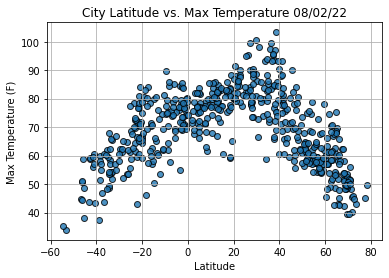

In [16]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

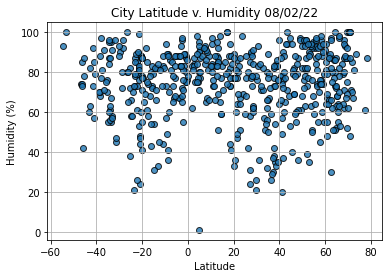

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude v. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

## Plot Latitude vs. Cloudiness

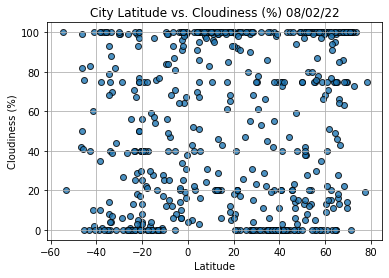

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

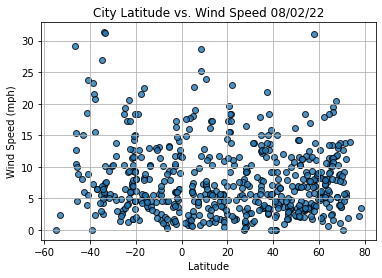

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()